# Exercises to Python Lecture 2


## Exercise 2.1 -- Filling a NumPy array with function values

As in Exercise 1 to Lecture 1, write code that creates a function that calculates the formula

$$y = 6 x^2 + 3 x + 2$$

and that returns y. Then make a NumPy array called x with 1001 points covering [-10,10]. Call the function with this array and store the results in a NumPy array. Print the minimum, maximum, mean values of the array. Find the value of x for which the function has its minimum in [-10,10].

In [8]:
import numpy as np

def func(x):
    return 6*x**2 + 3*x + 2

#create numpy array
x = np.linspace(-10,10,1001)

#call the function with previous array
new_array = func(x)

print("Minimum =", new_array.min())
print("Maximum =",new_array.max())
print("Mean    =",new_array.mean())
print("")

#finding the value of x for which the function has its minimum
print("x value corresponding to minimum =", x[new_array.argmin()])

Minimum = 1.6256
Maximum = 632.0
Mean    = 202.4

x value corresponding to minimum = -0.26


## Exercise 2.2 -- Slicing arrays and some other array operations

Create an array of 100,000 random numbers using numpy.random.rand(). Then go through the following exercises, using array slicing methods (and no loops):

1. Make an array that contains every *third* entry of the original array.
2. Make two arrays from the original array. One array should contain all entries < 0.8, the other one should contain all entries => 0.8. How many entries are in these arrays?
3. Find the mean, maximum, and minimum values of the original array.
4. Make an array that contains all entries of the original array that are between 0.3 and 0.4. How many are there? 
5. Write a function that takes a floating point number x as argument. It should return the square root of x if x < 0.5 and it should return the square of x if x >= 0.5. Vectorize the function and call it with the original array. Print the minimum, maximum, and mean values of the resulting array.





In [13]:
#create array with 100,000 random numbers
random_array = np.random.rand(100000)

# 1. Make an array that contains every third entry of the previous array
every_third = random_array[::3]

# 2. Making two arrays from the original array...
first = random_array[random_array < 0.8]

second = random_array[random_array >= 0.8]

#finding how many entries are in these arrays
print("Entries in first array  =", len(first))
print("Entries in second array =", len(second))

print("")

# 3. Finding the mean, max, and min of the original array
print("mean of random_array =", random_array.mean())
print("max of random_array  =", random_array.max())
print("min of random_array  =", random_array.min())

print("")

# 4. Making an array that contains all entries of the original array that are between 0.3 and 0.4

#Not elegent, but gets the job done
small_range = random_array[random_array > 0.3]
small_range = small_range[small_range < 0.4]

#how many entries are in this range
print("number of elements in range 0.3 to 0.4 =", len(small_range))

# 5.

def myfunc(x):
    if x < 0.5:
        return np.sqrt(x)
    else:
        return x**2
    
myfunc_vec = np.vectorize(myfunc)

a = myfunc_vec(random_array)

print("")

print("min  =",a.min())
print("max  =", a.max())
print("mean =", a.mean())

Entries in first array  = 80012
Entries in second array = 19988

mean of random_array = 0.499212746245
max of random_array  = 0.999982217165
min of random_array  = 1.13054264093e-05

number of elements in range 0.3 to 0.4 = 10011

min  = 0.00336235429562
max  = 0.999964434647
mean = 0.527138925864


## Exercise 2.3 -- Reading a data file

We have placed the file 'bbh_gw.dat' containing the gravitational wave signal of a binary black hole coalescence into your directory. Do the following:

1. Look at the first few lines of the file, then decide how to read it and read it in.
2. Slice the read-in data into three 1D arrays: time, hplus, hcross.
3. Change the time data so that the first entry in the time column is 0 (i.e. make the data start at t=0).
4. Let's define the time of merger as the time at which $$\sqrt{h_+^2 + h_\times^2}$$ is maximal. Find the time of merger.

In [25]:
import math as m

#read in data using loadtxt
indata = np.loadtxt("bbh_gw.dat")

#slice data into three 1D arrays
time = indata[:,0]
hplus = indata[:,1]
hcross = indata[:,2]

#shift time array so that data starts at t=0
time = time - time[0]

#print first element of time array to make sure it worked
print("First element of time array =", time[0])

#create white space between print statements
print("")

#time of merger corresponds to the max of the amplitude, so let's find it
#start by initializing a new array called amp filled with zeros and having the same length as the time array
amp = np.zeros(len(time))

#fill the array with the amplitude values
for i in range(len(time)):
    amp[i] = m.sqrt(hplus[i]**2 + hcross[i]**2)

#find the merger time i.e. time of max amplitude
merger_time = time[amp.argmax()]
#print it out
print("Time of BBH merger =", merger_time)

First element of time array = 0.0

Time of BBH merger = 0.47225868404


## Exercise 2.4 -- A first plot

Plot the function defined in Exercise 2.1 in the interval [-10,10]. Make one figure with three different graphs: one using 10 points for the x axis, one using 100 points, and one using 1000 points. Make a simple legend.


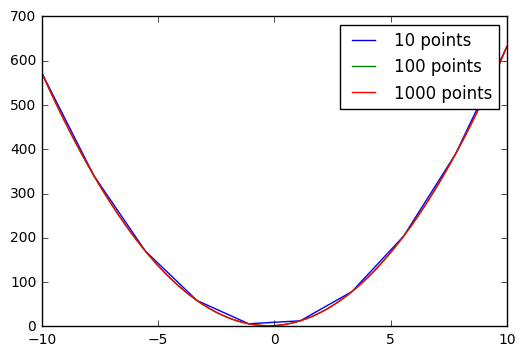

In [31]:
#very important-- must add the following to see your plot!
%matplotlib inline

import numpy as np
import matplotlib.pyplot as pl

def func(x):
    return 6*x**2 + 3*x + 2

x10 = np.linspace(-10,10,10)
x100 = np.linspace(-10,10,100)
x1000 = np.linspace(-10,10,1000)

new_array10 = func(x10)
new_array100 = func(x100)
new_array1000 = func(x1000)

pl.plot(x10,new_array10, label="10 points")
pl.plot(x100, new_array100, label="100 points")
pl.plot(x1000, new_array1000, label="1000 points")

pl.legend()

#if you have trouble seeing the difference between lines, try experimenting with xlim and ylim!

## Exercise 2.5 -- Plotting a gravitational wave

Take the data read in in exercise 2.3 and 

1. Plot $h_+$ and $h_\times$ as a function of time.
2. Make a second plot, focusing on the time around merger.
3. Make a plot of the amplitude $A = \sqrt{h_+^2 + h_\times^2}$.


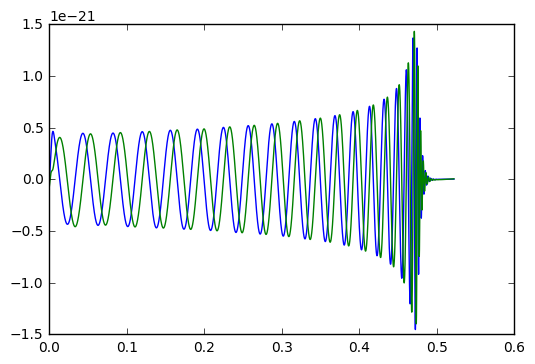

In [33]:
# 1. plot hplus and hcross as functions of time
pl.plot(time, hplus)
pl.plot(time, hcross)

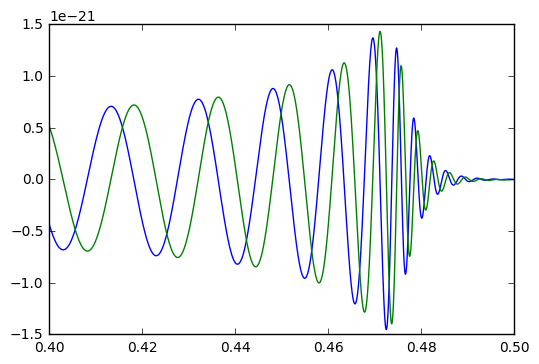

In [34]:
# 2. Focus on time around merger
pl.xlim(0.4, 0.5)
pl.plot(time, hplus)
pl.plot(time, hcross)

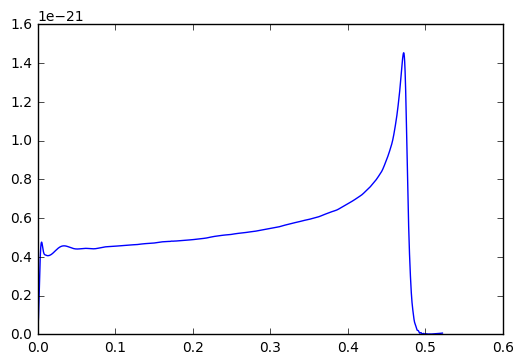

In [35]:
# 3. Plot the amplitude
pl.plot(time, amp)